# Clasificación con SVM

Para esta actividad vamos a utilizar un dataset que se encuentra disponible entre los datasets de prueba de la librería scikit-learn: **breast cancer dataset**.

Este es un dataset que sirve para realizar clasificación binaria. Tiene un total de 569 ejemplos, con 30 features cada uno y 2 clases posibles (maligno o benigno). 

El objetivo es, dada una nueva instancia, determinar a que clase pertenece: maligno o benigno.

**Ejercicio 1:**

**a)** Obtener el dataset de la librería Scikit-learn como un pandas Dataframe, almacenando los datos en una variable llamada *df_data* y los labels en otra variable llamada *df_labels*

**Ayuda:** 
El [método de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) para levantar el dataset requerido permite convertir la salida en un Dataframe de pandas con el parametro as_frame. Para realizar este ejercicio es necesario investigar en el sitio oficial de Scikit-Learn como se retornan los datos y los labels cuando este parametro está seteado en True.

In [2]:
# a) Obtener el dataset de la librería Scikit-learn como un pandas Dataframe, almacenando los datos en una variable llamada df_data y los labels en otra variable llamada df_labels
# Ayuda: El método de Scikit-Learn para levantar el dataset requerido permite convertir la salida en un Dataframe de pandas con el parametro as_frame. Para realizar este ejercicio es necesario investigar en el sitio oficial de Scikit-Learn como se retornan los datos y los labels cuando este parametro está seteado en True.

from sklearn.datasets import load_breast_cancer
import pandas as pd

ds = load_breast_cancer(as_frame=True)

df_data = ds.data
df_labels = ds.target

**b)** Imprimir los 10 primeros elementos

In [3]:
display(df_data.head(10))
display(df_labels.head(10))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

**c)** Imprimir lo 10 ultimos elementos

In [4]:
display(df_data.tail(10))
display(df_labels.tail(10))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int64

**d)** Imprimir los nombres de las columnas (features) del dataset

In [4]:
print(df_data.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


**e)** Imprimir la cantidad de features que presenta el dataset

In [5]:
print(len(df_data.columns))

30


**f)** Imprimir los 10 primeros labels

In [6]:
display(df_labels.head(30))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: target, dtype: int64

**g)** Imprimir la cantidad de ejemplos (filas) de cada label

In [7]:
print(df_labels.value_counts())

target
1    357
0    212
Name: count, dtype: int64


### Análisis de relaciones entre los features
Ahora que pudimos observar como está compuesto el dataset, sus features y sus labels, veamos graficamente cuales son las relaciones que presentan los features entre si.
Observemos unicamente las relaciones entre 5 features 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness'

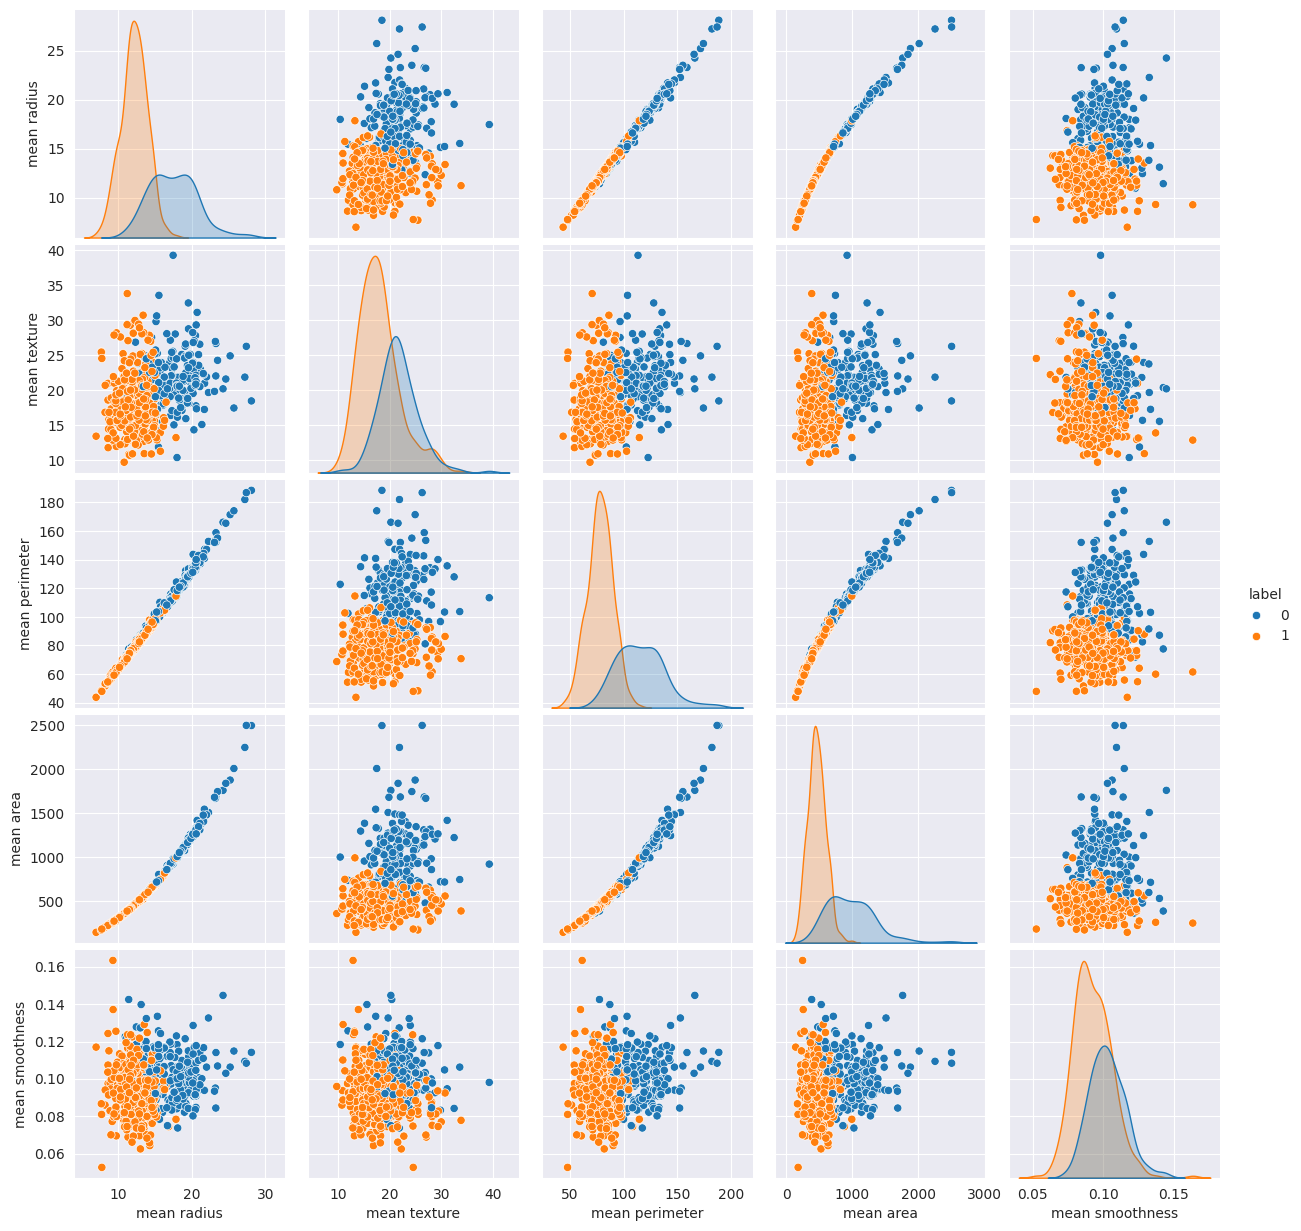

In [8]:
import seaborn as sns

df = df_data
df['label'] = df_labels
sns.pairplot(df, hue='label', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])


Este tipo de graficos y comparaciones pueden darnos una idea de que tipo de algoritmo de SVM utilizar, lineal o no lineal.

# SVM no lineal con kernel sigmoideo

Ahora que analizamos los datos y sus features vamos a crear varios modelos SVM, entrenarlos con nuestros datos y observar su rendimiento.

Para ello, primero tenemos que dividir los datos en dataset de entrenamiento y dataset de testeo.

**Ejercicio 2:**

**a)** Dividir los datos dejando el 80% para entrenamiento y el 20% para testeo. Para ello usamos las variables *df_data* y *df_labels* creadas anteriormente. Usar las variables **X_train, X_test, y_train, y_test** para almacenar los distintos datasets.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2)

In [10]:
print('El tamaño de X_train es:', X_train.shape)
print('El tamaño de y_train es:', y_train.shape)
print()
print('El tamaño de X_test es:', X_test.shape)
print('El tamaño de y_test es:', y_test.shape)

El tamaño de X_train es: (455, 31)
El tamaño de y_train es: (455,)

El tamaño de X_test es: (114, 31)
El tamaño de y_test es: (114,)


**b)** Importar el modulo de Scikit-Learn para la creación de un modelo SVM para clasificación y crear una instancia de este. En este caso, vamos a utilizar un modelo no lineal, con un *kernel sigmoideo*. 

In [11]:
from sklearn.svm import SVC

**c)** Ajustar el modelo con la función .fit() a los datos de entrenamiento

In [12]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

SVC(kernel='sigmoid')

### Evaluación del modelo SVM no lineal con kernel sigmoideo
Ahora que tenemos el modelo SVM no lineal con kernel sigmoideo entrenado, vamos a realizar predicciones para el dataset de entrenamiento y observar el rendimiento del modelo, analizando la matrix de confusión.

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

y_train_predict = svc_model.predict(X_train)

cm_train = np.array(confusion_matrix(y_train, y_train_predict, labels=[0,1]))

confusion_matrix_train = pd.DataFrame(cm_train, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])


In [14]:
confusion_matrix_train

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),18,146
Benigno (Real),93,198


Vemos que el modelo cometió varios errores en training. Veamos como lo hace en el dataset de testeo.

In [15]:
y_test_predict = svc_model.predict(X_test)

cm_test = np.array(confusion_matrix(y_test, y_test_predict, labels=[0,1]))

confusion_matrix_test = pd.DataFrame(cm_test, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])


In [16]:
confusion_matrix_test

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),8,40
Benigno (Real),27,39


Ahora observemos algunas métricas, como por ejemplo el **Accuracy**.

In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_test_predict))


Accuracy: 0.41228070175438597


Además, con Scikit-Learn podemos crear facilmente un **reporte de clasificación** para observar las distintas metricas.

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predict))


              precision    recall  f1-score   support

           0       0.23      0.17      0.19        48
           1       0.49      0.59      0.54        66

    accuracy                           0.41       114
   macro avg       0.36      0.38      0.37       114
weighted avg       0.38      0.41      0.39       114



Como podemos ver, el resultado no es el esperado. Con los cual, vamos a probar con otro kernel distinto. En este caso utilizaremos un kernel polinomial

# SVM no lineal con kernel polinomial

**Ejercicio 3:**

**a)** Crear un modelo SVM no lineal con kernel polinomial y ajustarlo a los datos de entrenamiento.

In [19]:
svc_model = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

SVC(kernel='poly')

### Evaluación del modelo SVM no lineal con kernel polinomial
Una vez creado el modelo y ajustado a los datos de entrenamiento vamos a analizar las predicciones.

**Ejercicio 4:**

**a)** Evaluar el modelo en el dataset de entrenamiento, creando la matriz de confusión

In [20]:
y_train_predict = svc_model.predict(X_train)

cm_test = np.array(confusion_matrix(y_train, y_train_predict, labels=[0,1]))

confusion_matrix_test = pd.DataFrame(cm_test, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [21]:
confusion_matrix_train

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),18,146
Benigno (Real),93,198


**b)** Evaluar el modelo en el dataset de testeo, creando la matriz de confusión


In [22]:
y_test_predict = svc_model.predict(X_test)

cm_test = np.array(confusion_matrix(y_test, y_test_predict, labels=[0,1]))

confusion_matrix_test = pd.DataFrame(cm_test, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [23]:
confusion_matrix_test

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),36,12
Benigno (Real),2,64


**c)** Imprimir el Accuracy para las predicciones en el dataset de testeo

In [24]:
print("Accuracy:",accuracy_score(y_test, y_test_predict))

Accuracy: 0.8771929824561403


**d)** Imprimir el reporte de clasificación en testeo

In [25]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        48
           1       0.84      0.97      0.90        66

    accuracy                           0.88       114
   macro avg       0.89      0.86      0.87       114
weighted avg       0.89      0.88      0.87       114



Si todo salió bien, en este punto nos daremos cuenta que utilizar el kernel polinomial fue una mejor decisión y que ahora tenemos un Accuracy mayor que 90%.

Veamos que sucede si utilizamos un kernel lineal, es decir, SVM lineal.

# SVM Lineal

**Ejercicio 5:**

**a)** Crear un modelo SVM lineal y ajustarlo a los datos de entrenamiento

In [26]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

### Evaluación del modelo SVM Lineal
Una vez creado el modelo y ajustado a los datos de entrenamiento vamos a analizar las predicciones.

**Ejercicio 4:**

**a)** Evaluar el modelo en el dataset de entrenamiento, creando la matriz de confusión

In [27]:
y_train_predict = svc_model.predict(X_train)

In [28]:
y_train_predict = svc_model.predict(X_train)

cm_test = np.array(confusion_matrix(y_test, y_test_predict, labels=[0,1]))

confusion_matrix_test = pd.DataFrame(cm_test, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [29]:
confusion_matrix_test

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),36,12
Benigno (Real),2,64


**b)** Evaluar el modelo en el dataset de testeo, creando la matriz de confusión

In [30]:
y_test_predict = svc_model.predict(X_test)

cm_test = np.array(confusion_matrix(y_test, y_test_predict, labels=[0,1]))

confusion_matrix_test = pd.DataFrame(cm_test, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [31]:
confusion_matrix_test

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),48,0
Benigno (Real),0,66


**c)** Imprimir el Accuracy para las predicciones en el dataset de testeo

In [32]:
print("Accuracy:",accuracy_score(y_test, y_test_predict))

Accuracy: 1.0


**d)** Imprimir el reporte de clasificación en testeo

In [33]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        66

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



En este caso, deberiamos obtener un clasificador con un **Accuracy del 100% o muy cercano**. 

Naturalmente, esto no significa que creamos un modelo perfecto para la detección de cancer, la realidad es que este dataset es un dataset de ejemplo, es decir, con pocas instancias que sirve para aprender a utilizar los diferentes algoritmos. Para llevar este modelo a producción habría que conseguir muchas mas instancias y entrenar modelos más complejos.